In [ ]:
 from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd


In [ ]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
import string 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [ ]:
from tensorflow import keras
from keras.preprocessing import text,sequence
from keras.models import Sequential
from keras.layers import Dense,Embedding,LSTM,Dropout


In [ ]:
%matplotlib inline

In [ ]:
import spacy
import re
import gensim
import tqdm
from sklearn.metrics import  accuracy_score, confusion_matrix
import tensorflow as tf
from keras.preprocessing.text import one_hot

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
fake = pd.read_csv('/content/drive/MyDrive/Data /Fake.csv')
true = pd.read_csv('/content/drive/MyDrive/Data /True.csv')

In [ ]:
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [ ]:
true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [ ]:
fake.shape

(23481, 4)

In [ ]:
true.shape

(21417, 4)

In [ ]:
fake['target']=0
true['target']=1

In [ ]:
fake.head()

,title,text,subject,date,target
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [ ]:
true.head()

,title,text,subject,date,target
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [ ]:
true.tail()

,title,text,subject,date,target
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1
21416,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017",1


In [ ]:
fake.tail()

,title,text,subject,date,target
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0
23480,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016",0


In [ ]:
data= pd.concat([true,fake], ignore_index=True,sort=False)
data.head()

,title,text,subject,date,target
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   target   44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.7+ MB


In [ ]:
data.describe()

,target
count,44898.000000
mean,0.477015
std,0.499477
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [ ]:
data.isnull().sum()

title      0
text       0
subject    0
date       0
target     0
dtype: int64

0    23481
1    21417
Name: target, dtype: int64


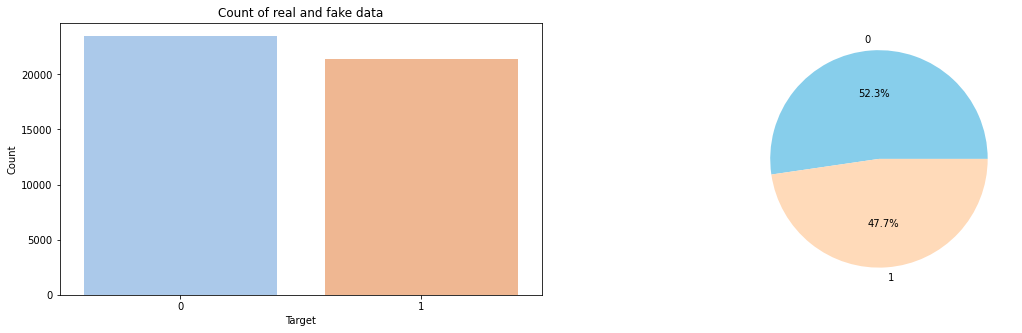

In [ ]:
#visualization
#count of real and fake data
print(data["target"].value_counts())
fig, ax = plt.subplots(1,2, figsize=(19, 5))
g1 = sns.countplot(data.target,ax=ax[0],palette="pastel");
g1.set_title("Count of real and fake data")
g1.set_ylabel("Count")
g1.set_xlabel("Target")
g2 = plt.pie(data["target"].value_counts().values,explode=[0,0],labels=data.target.value_counts().index, autopct='%1.1f%%',colors=['SkyBlue','PeachPuff'])
fig.show()

In [ ]:
#distribution of the subject according to fake and real data


politicsNews       11272
worldnews          10145
News                9050
politics            6841
left-news           4459
Government News     1570
US_News              783
Middle-east          778
Name: subject, dtype: int64


Text(0.5, 1.0, 'Distribution of The Subject According to Real and Fake Data')

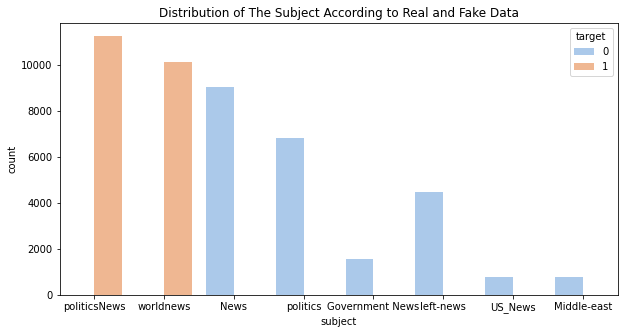

In [ ]:
from sklearn import datasets
print(data.subject.value_counts())
plt.figure(figsize=(10, 5))

ax = sns.countplot(x="subject",  hue='target', data=data, palette="pastel")
plt.title("Distribution of The Subject According to Real and Fake Data")

In [ ]:
#data cleaning
data['text']= data['subject'] + " " + data['title'] + " " + data['text']
del data['title']
del data['subject']
del data['date']
data.head()

,text,target
0,"politicsNews As U.S. budget fight looms, Repub...",1
1,politicsNews U.S. military to accept transgend...,1
2,politicsNews Senior U.S. Republican senator: '...,1
3,politicsNews FBI Russia probe helped by Austra...,1
4,politicsNews Trump wants Postal Service to cha...,1


In [ ]:
first_text = data.text[10]
first_text

'politicsNews Jones certified U.S. Senate winner despite Moore challenge (Reuters) - Alabama officials on Thursday certified Democrat Doug Jones the winner of the state’s U.S. Senate race, after a state judge denied a challenge by Republican Roy Moore, whose campaign was derailed by accusations of sexual misconduct with teenage girls. Jones won the vacant seat by about 22,000 votes, or 1.6 percentage points, election officials said. That made him the first Democrat in a quarter of a century to win a Senate seat in Alabama.  The seat was previously held by Republican Jeff Sessions, who was tapped by U.S. President Donald Trump as attorney general. A state canvassing board composed of Alabama Secretary of State John Merrill, Governor Kay Ivey and Attorney General Steve Marshall certified the election results. Seating Jones will narrow the Republican majority in the Senate to 51 of 100 seats. In a statement, Jones called his victory “a new chapter” and pledged to work with both parties. M

In [ ]:
#removal of html content
from bs4 import BeautifulSoup

soup = BeautifulSoup(first_text, "html.parser")
first_text = soup.get_text()
first_text

'politicsNews Jones certified U.S. Senate winner despite Moore challenge (Reuters) - Alabama officials on Thursday certified Democrat Doug Jones the winner of the state’s U.S. Senate race, after a state judge denied a challenge by Republican Roy Moore, whose campaign was derailed by accusations of sexual misconduct with teenage girls. Jones won the vacant seat by about 22,000 votes, or 1.6 percentage points, election officials said. That made him the first Democrat in a quarter of a century to win a Senate seat in Alabama.  The seat was previously held by Republican Jeff Sessions, who was tapped by U.S. President Donald Trump as attorney general. A state canvassing board composed of Alabama Secretary of State John Merrill, Governor Kay Ivey and Attorney General Steve Marshall certified the election results. Seating Jones will narrow the Republican majority in the Senate to 51 of 100 seats. In a statement, Jones called his victory “a new chapter” and pledged to work with both parties. M

In [ ]:
#removal of puncutation marks abd special characters

In [ ]:
first_text = re.sub('\[[^]]*\]', ' ', first_text)
first_text = re.sub('[^a-zA-Z]',' ',first_text)  # replaces non-alphabets with spaces
first_text = first_text.lower() # Converting from uppercase to lowercase
first_text

'politicsnews jones certified u s  senate winner despite moore challenge  reuters    alabama officials on thursday certified democrat doug jones the winner of the state s u s  senate race  after a state judge denied a challenge by republican roy moore  whose campaign was derailed by accusations of sexual misconduct with teenage girls  jones won the vacant seat by about        votes  or     percentage points  election officials said  that made him the first democrat in a quarter of a century to win a senate seat in alabama   the seat was previously held by republican jeff sessions  who was tapped by u s  president donald trump as attorney general  a state canvassing board composed of alabama secretary of state john merrill  governor kay ivey and attorney general steve marshall certified the election results  seating jones will narrow the republican majority in the senate to    of     seats  in a statement  jones called his victory  a new chapter  and pledged to work with both parties  m

In [ ]:
#removal of stop words

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
nltk.download("stopwords")   
from nltk.corpus import stopwords  

# we can use tokenizer instead of split
first_text = nltk.word_tokenize(first_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
first_text = [ word for word in first_text if not word in set(stopwords.words("english"))]

In [ ]:
#Lemmatization
#Lemmatization to bring back multiple forms of same word to their common root like 'coming', 'comes' into 'come'.


In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
nltk.download('omw-1.4')


[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
lemma = nltk.WordNetLemmatizer()
first_text = [ lemma.lemmatize(word) for word in first_text] 

first_text = " ".join(first_text)
first_text

'politicsnews jones certified u senate winner despite moore challenge reuters alabama official thursday certified democrat doug jones winner state u senate race state judge denied challenge republican roy moore whose campaign derailed accusation sexual misconduct teenage girl jones vacant seat vote percentage point election official said made first democrat quarter century win senate seat alabama seat previously held republican jeff session tapped u president donald trump attorney general state canvassing board composed alabama secretary state john merrill governor kay ivey attorney general steve marshall certified election result seating jones narrow republican majority senate seat statement jones called victory new chapter pledged work party moore declined concede defeat even trump urged stood claim fraudulent election statement released certification said regret medium outlet reported alabama judge denied moore request block certification result dec election decision shortly canvass

In [ ]:
#Perform it for all the examples
#We performed the steps for a single example. Now let's perform it for all the examples in the data.


In [ ]:
#Removal of HTML Contents
def remove_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

#Removal of Punctuation Marks
def remove_punctuations(text):
    return re.sub('\[[^]]*\]', '', text)

# Removal of Special Characters
def remove_characters(text):
    return re.sub("[^a-zA-Z]"," ",text)

#Removal of stopwords 
def remove_stopwords_and_lemmatization(text):
    final_text = []
    text = text.lower()
    text = nltk.word_tokenize(text)
    for word in text:
        if word not in set(stopwords.words('english')):
            lemma = nltk.WordNetLemmatizer()
            word = lemma.lemmatize(word) 
            final_text.append(word)
    return " ".join(final_text)

In [ ]:
def cleaning(text):
    text = remove_html(text)
    text = remove_punctuations(text)
    text = remove_characters(text)
    text = remove_stopwords_and_lemmatization(text)
    return text

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences



In [ ]:
data['text']=data['text'].apply(remove_stopwords_and_lemmatization)

LookupError: ignored

In [ ]:
tokenizer =  Tokenizer()
tokenizer.fit_on_texts(df['cleaning'])
word_index = tokenizer.word_index
vocab_size = len(word_index)
vocab_size

NameError: ignored

In [ ]:
import gensim

In [ ]:
y = data['target'].values

In [ ]:
X = [d.split() for d in data['text'].tolist()]

In [ ]:
type(X)
type(X[0])

list

In [ ]:
print(X[0])


['politicsNews', 'As', 'U.S.', 'budget', 'fight', 'looms,', 'Republicans', 'flip', 'their', 'fiscal', 'script', 'WASHINGTON', '(Reuters)', '-', 'The', 'head', 'of', 'a', 'conservative', 'Republican', 'faction', 'in', 'the', 'U.S.', 'Congress,', 'who', 'voted', 'this', 'month', 'for', 'a', 'huge', 'expansion', 'of', 'the', 'national', 'debt', 'to', 'pay', 'for', 'tax', 'cuts,', 'called', 'himself', 'a', '“fiscal', 'conservative”', 'on', 'Sunday', 'and', 'urged', 'budget', 'restraint', 'in', '2018.', 'In', 'keeping', 'with', 'a', 'sharp', 'pivot', 'under', 'way', 'among', 'Republicans,', 'U.S.', 'Representative', 'Mark', 'Meadows,', 'speaking', 'on', 'CBS’', '“Face', 'the', 'Nation,”', 'drew', 'a', 'hard', 'line', 'on', 'federal', 'spending,', 'which', 'lawmakers', 'are', 'bracing', 'to', 'do', 'battle', 'over', 'in', 'January.', 'When', 'they', 'return', 'from', 'the', 'holidays', 'on', 'Wednesday,', 'lawmakers', 'will', 'begin', 'trying', 'to', 'pass', 'a', 'federal', 'budget', 'in', '

In [ ]:
DIM = 100 # sequence of 100 vectors
w2v_model = gensim.models.Word2Vec(sentences=X, vector_size=DIM, window =10, min_count=1)

TypeError: ignored

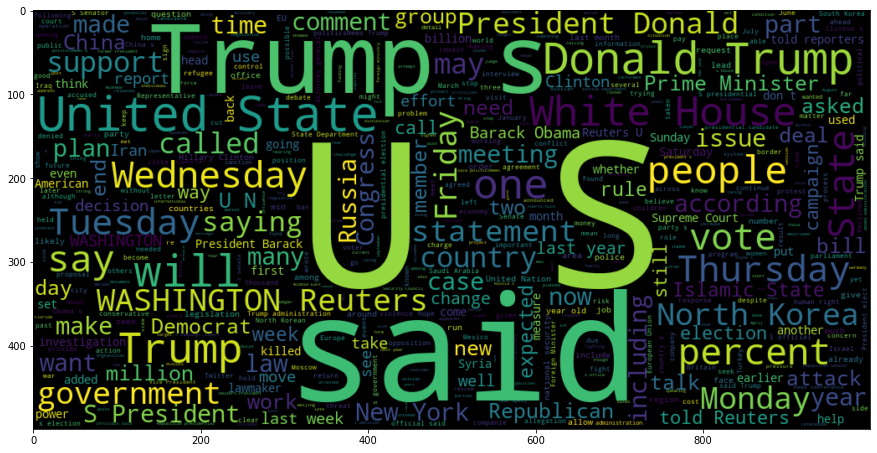

In [ ]:
from wordcloud import WordCloud,STOPWORDS
plt.figure(figsize = (15,15))
wc = WordCloud(max_words = 500 , width = 1000 , height = 500 , stopwords = STOPWORDS).generate(" ".join(data[data.target == 1].text))
plt.imshow(wc , interpolation = 'bilinear')

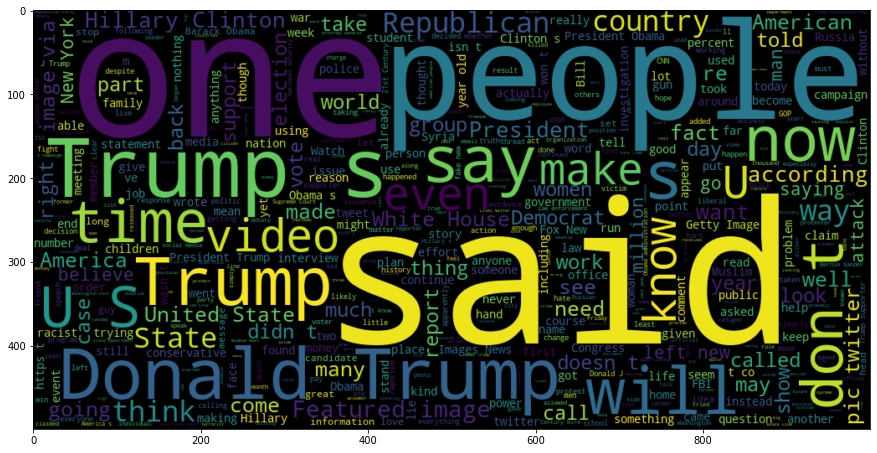

In [ ]:
plt.figure(figsize = (15,15))
wc = WordCloud(max_words = 500 , width = 1000 , height = 500 , stopwords = STOPWORDS).generate(" ".join(data[data.target == 0].text))
plt.imshow(wc , interpolation = 'bilinear')

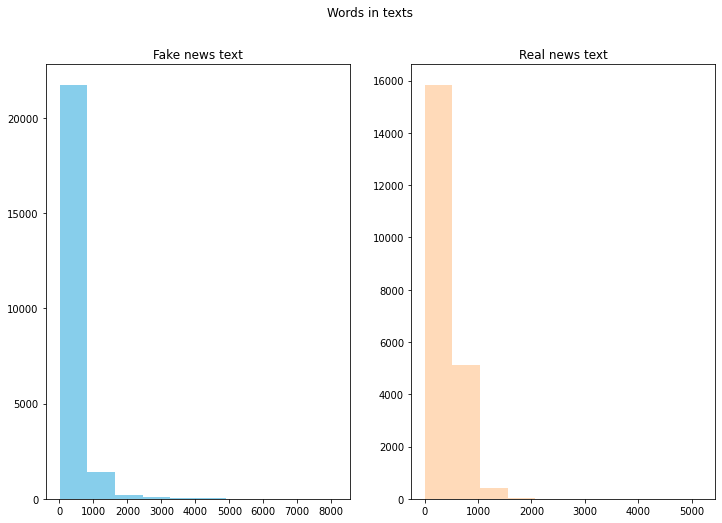

In [ ]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,8))
text_len=data[data['target']==0]['text'].str.split().map(lambda x: len(x))
ax1.hist(text_len,color='SkyBlue')
ax1.set_title('Fake news text')
text_len=data[data['target']==1]['text'].str.split().map(lambda x: len(x))
ax2.hist(text_len,color='PeachPuff')
ax2.set_title('Real news text')
fig.suptitle('Words in texts')
plt.show()

In [ ]:
texts = ' '.join(data['text'])

In [ ]:
string = texts.split(" ")

In [ ]:
def draw_n_gram(string,i):
    n_gram = (pd.Series(nltk.ngrams(string, i)).value_counts())[:15]
    n_gram_df=pd.DataFrame(n_gram)
    n_gram_df = n_gram_df.reset_index()
    n_gram_df = n_gram_df.rename(columns={"index": "word", 0: "count"})
    print(n_gram_df.head())
    plt.figure(figsize = (16,9))
    return sns.barplot(x='count',y='word', data=n_gram_df)

     word   count
0  (the,)  906993
1   (to,)  538712
2     (,)  480426
3   (of,)  441474
4  (and,)  393943


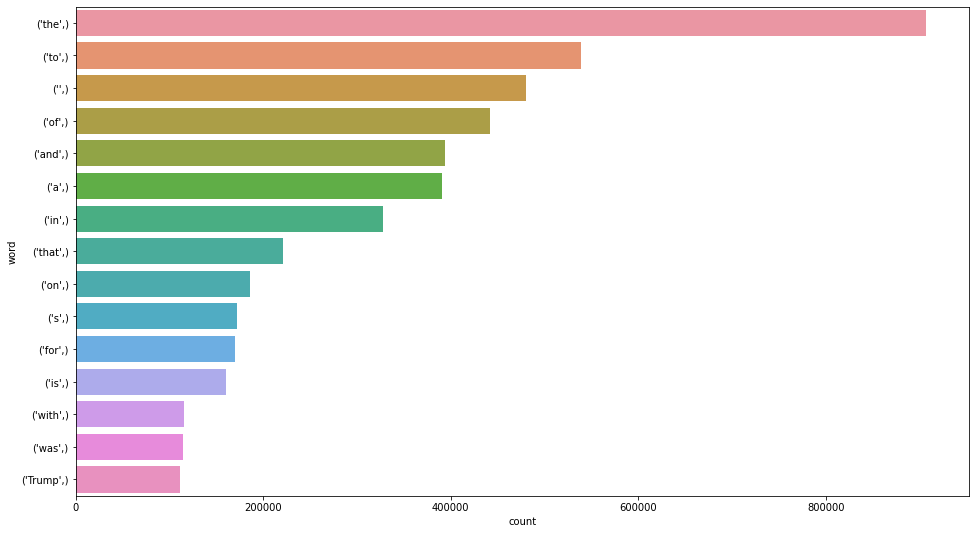

In [ ]:
draw_n_gram(string,1)

        word   count
0  (of, the)  100341
1       (, )   82800
2  (in, the)   76683
3  (to, the)   48988
4  (on, the)   33953


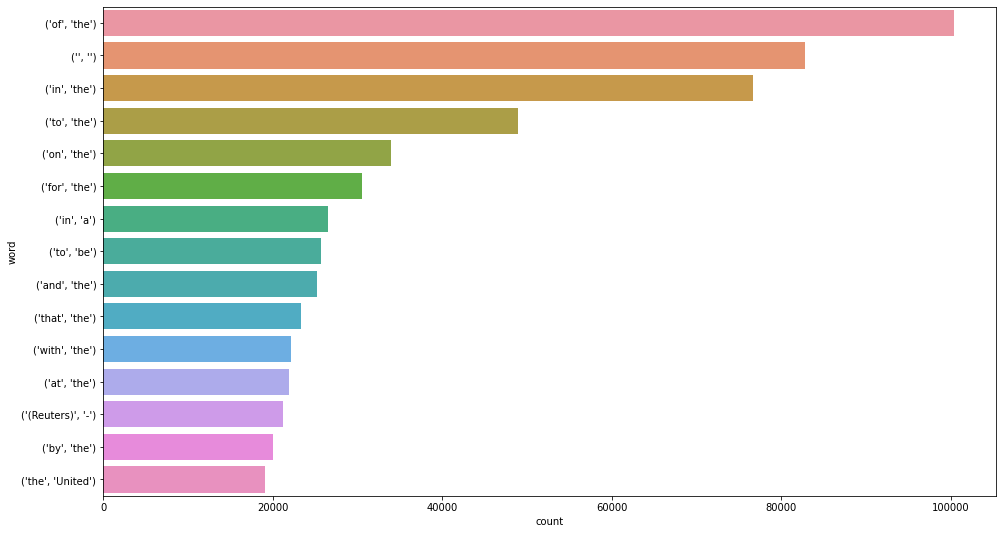

In [ ]:
draw_n_gram(string,2)

                         word  count
0                      (, , )  27659
1       (the, United, States)  10764
2  (WASHINGTON, (Reuters), -)   6482
3               (said, in, a)   6204
4              (one, of, the)   5998


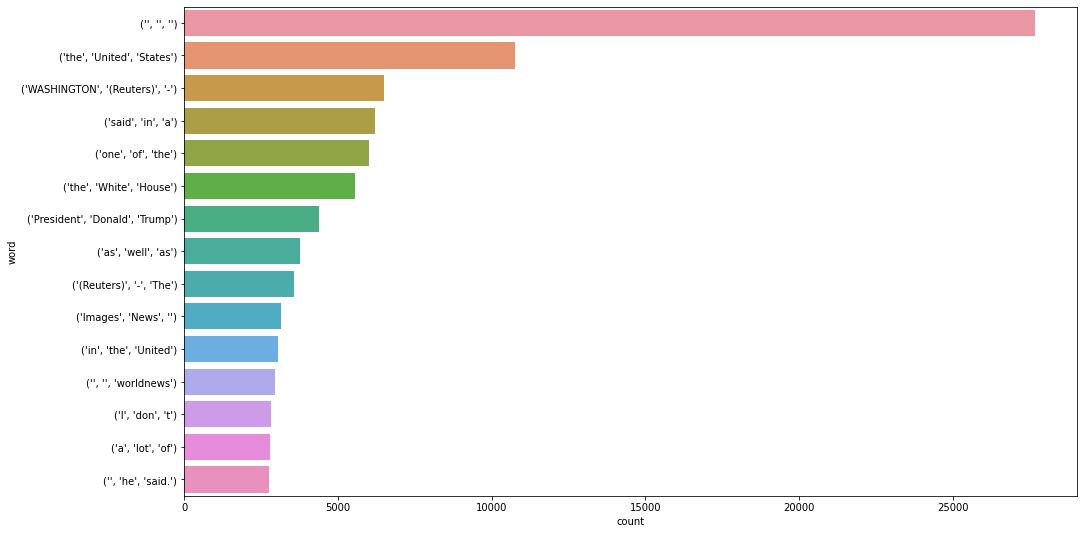

In [ ]:
draw_n_gram(string,3)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data['text'], data['target'], random_state=0)

In [ ]:
max_features = 10000
maxlen = 300

In [ ]:
from keras.utils import pad_sequences
tokenizer = text.Tokenizer(num_words=max_features++)

tokenizer.fit_on_texts(X_train)
tokenized_train = tokenizer.texts_to_sequences(X_train)
X_train = pad_sequences(tokenized_train, maxlen=maxlen)


SyntaxError: ignored

In [ ]:
batch_size = 256
epochs = 10
embed_size = 100

In [ ]:
model = Sequential()
#Non-trainable embeddidng layer
model.add(Embedding(max_features, output_dim=embed_size, input_length=maxlen, trainable=False))
#LSTM 
model.add(LSTM(units=128 , return_sequences = True , recurrent_dropout = 0.25 , dropout = 0.25))
model.add(LSTM(units=64 , recurrent_dropout = 0.1 , dropout = 0.1))
model.add(Dense(units = 32 , activation = 'relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer=keras.optimizers.Adam(lr = 0.01), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 300, 100)          1000000   
                                                                 
 lstm (LSTM)                 (None, 300, 128)          117248    
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,168,769
Trainable params: 168,769
Non-trainable params: 1,000,000
_________________________________________________________________


In [ ]:
# Applying Naive Bayes


In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.feature_extraction.text import CountVectorizer

X = data.copy()

score = []
kfold = StratifiedKFold(n_splits=5)
vc = CountVectorizer()
df_count = vc.fit_transform(data.text.values)

In [ ]:
print(df_count.shape)


(44898, 122516)


In [ ]:
#sparse vector of the first text
print(df_count[0,:])

#print(vc.vocabulary_)
print(vc.get_feature_names_out())
print(vc.get_feature_names_out()[107802], df_count[0,107802])


#for i in range(107800,df_count[0].shape[1]):    
 #    print(df_count[0,i],vc.get_feature_names_out()[i])

  (0, 85535)	1
  (0, 13741)	8
  (0, 21351)	6
  (0, 42374)	2
  (0, 66609)	1
  (0, 92327)	9
  (0, 43111)	1
  (0, 108386)	4
  (0, 42716)	4
  (0, 97453)	1
  (0, 117337)	2
  (0, 92891)	1
  (0, 108257)	44
  (0, 50635)	1
  (0, 79457)	13
  (0, 28244)	3
  (0, 92323)	6
  (0, 40978)	1
  (0, 54875)	19
  (0, 28104)	2
  (0, 118489)	4
  (0, 116520)	3
  (0, 108731)	3
  (0, 73446)	1
  (0, 43553)	15
  :	:
  (0, 98439)	1
  (0, 57811)	1
  (0, 118401)	1
  (0, 96897)	1
  (0, 43203)	2
  (0, 47685)	1
  (0, 93291)	1
  (0, 97288)	1
  (0, 38311)	1
  (0, 10293)	3
  (0, 11929)	1
  (0, 7404)	1
  (0, 18233)	2
  (0, 9954)	1
  (0, 53400)	1
  (0, 108057)	1
  (0, 87966)	1
  (0, 93320)	1
  (0, 118685)	1
  (0, 22430)	1
  (0, 41341)	1
  (0, 40190)	1
  (0, 5783)	1
  (0, 92377)	1
  (0, 120927)	1
['00' '000' '0000' ... 'émigré' 'état' 'žižek']
tennesseebe 0


In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.feature_extraction.text import CountVectorizer

X = data.copy()

score = []
kfold = StratifiedKFold(n_splits=5)

for train, valid in kfold.split(X, X.target):
    X_train = X.loc[train]
    X_valid = X.loc[valid]
    y_train = X_train.pop("target")
    y_valid = X_valid.pop("target")
    
    vc = CountVectorizer()
    X_count_train = vc.fit_transform(X_train.text.values)
    X_count_valid = vc.transform(X_valid.text.values)
    
    nb = MultinomialNB()
    nb.fit(X_count_train, y_train)
    
    score.append(nb.score(X_count_valid, y_valid))
    print(nb.score(X_count_valid, y_valid))

vc = CountVectorizer()
df_count = vc.fit_transform(data.text.values)

#np.append(df_count, df[pd.get_dummies(df["subject"]).columns.values].values)
#df_count.shape

print("=====================================================")
print(np.mean(score))
nb = MultinomialNB()
nb.fit(df_count, data.target)

0.9546770601336303
0.9412026726057906
0.9149220489977729
0.931618220291792
0.9409733823365631
0.9366786768731098


MultinomialNB()

In [ ]:
def predict(X):
    X_count = vc.transform(X.values)
    return nb.predict(X_count)
def predict_proba(X):
    X_count = vc.transform(X.values)
    #np.append(df_count, df[pd.get_dummies(df["subject"]).columns.values].values)
    return nb.predict_proba(X_count)

In [ ]:
#demo = """34-year old Volodymyr Karpenko, a financial and trade consultant who 
#spent several years in Moscow working for the Kremlin, publicly accused Vladimir Putin in 
#2021 of organizing his kidnapping in
#Moscow in 2016 and holding his as a prisoner and personal sex slave for more than three years."""





In [ ]:
demo = """
President Joe Biden hasn’t filed anything yet with the Federal Election Commission that would officially indicate he’s running for reelection. But partisan social media accounts have been falsely claiming that he has. The claims are based on a misinterpretation of a routine filing.
"""

In [ ]:
prediction = predict(pd.DataFrame([demo], columns=["f"]).f)
print(prediction)
prediction_proba = predict_proba(pd.DataFrame([demo], columns=["f"]).f)
print(prediction_proba)
print("\nPrediction:","Fake" if prediction[0] == '1' else "True")
print("Probability:")
print("\tFake:",prediction_proba[0][1])
print("\tTrue:",prediction_proba[0][0])

[0]
[[9.99145214e-01 8.54785578e-04]]

Prediction: True
Probability:
	Fake: 0.0008547855781557232
	True: 0.9991452144218388


In [ ]:
##############################################################################